**Introduction**

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.




1.    Libraries



In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [4]:
 df=pd.read_csv('/content/BankChurners.csv')

In [5]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
df=df[df.columns[:-2]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
print(df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [11]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

*Exploratory Data Analysis*

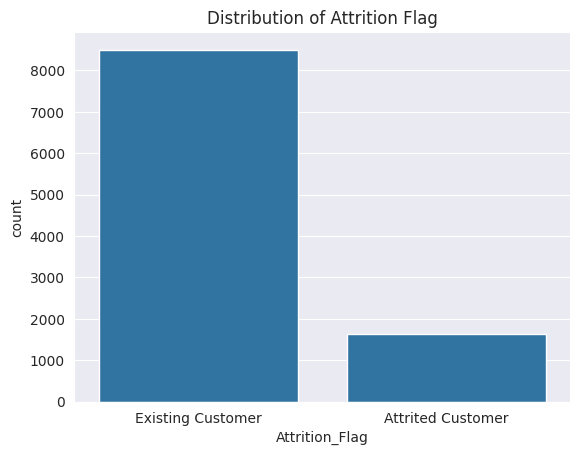

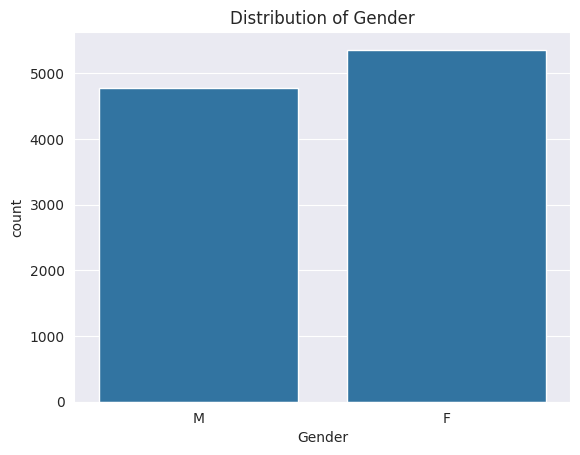

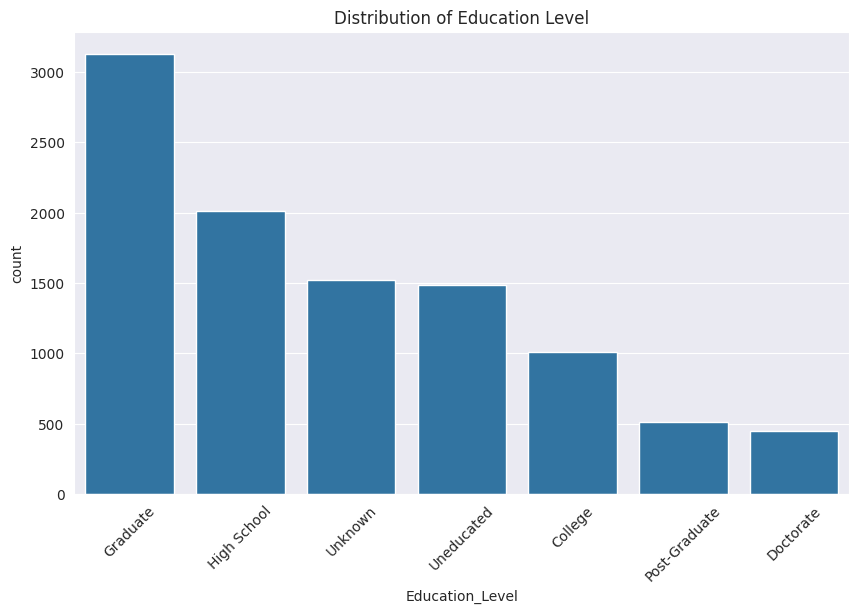

In [12]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribution of Attrition Flag')
plt.show()

# Distribution of 'Gender'
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

# Distribution of 'Education_Level'
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xticks(rotation=45)
plt.show()

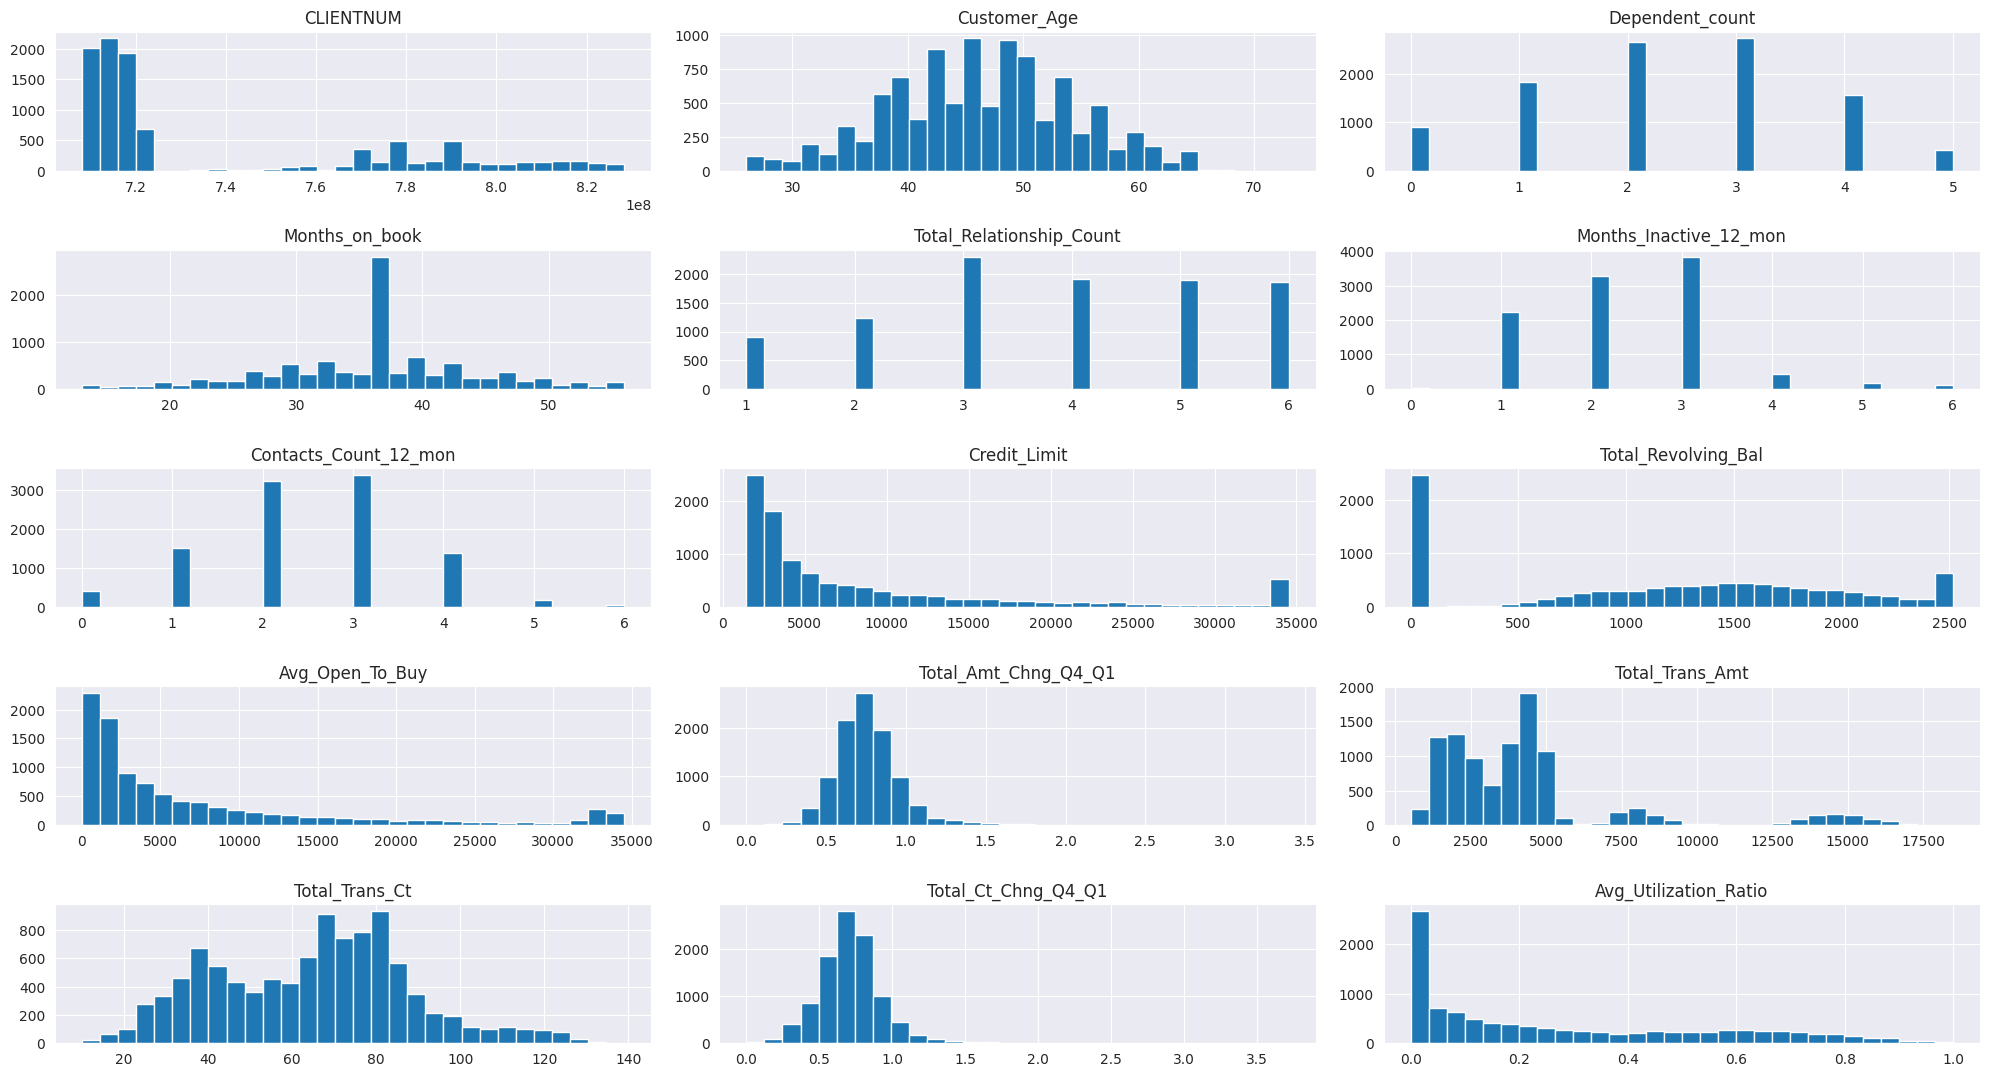

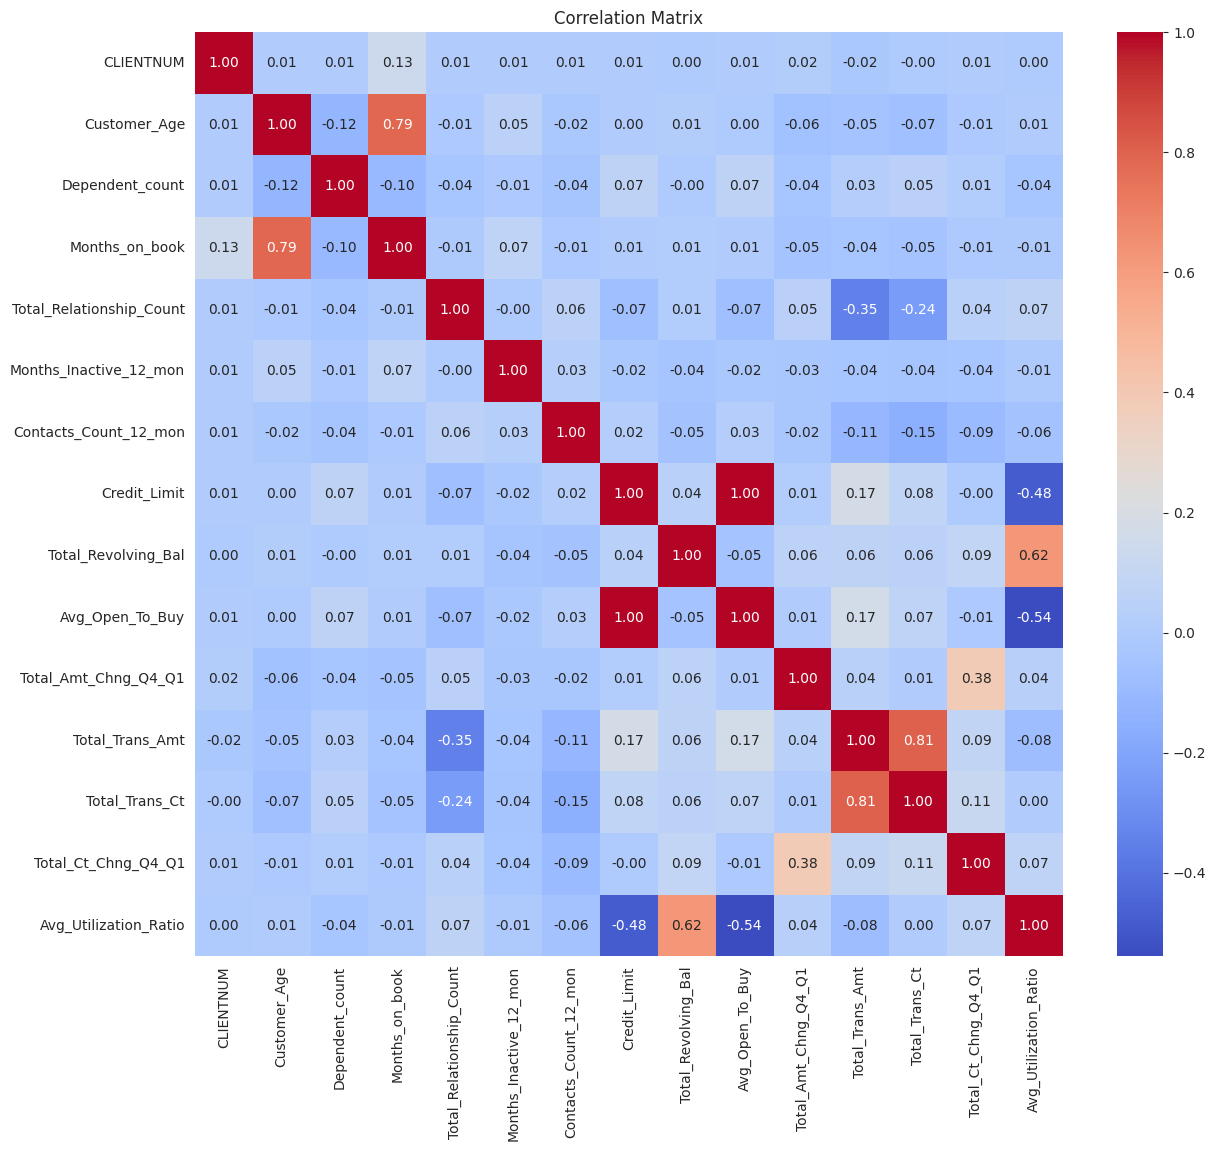

In [15]:
# Histogram of numerical columns
df.hist(bins=30, figsize=(20, 15), layout=(7, 3))
plt.tight_layout()
plt.show()

numeric_data = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

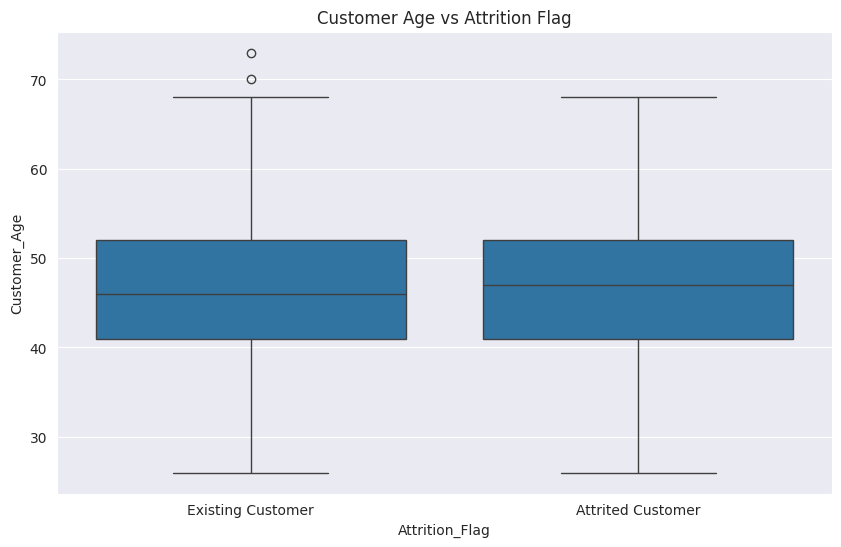

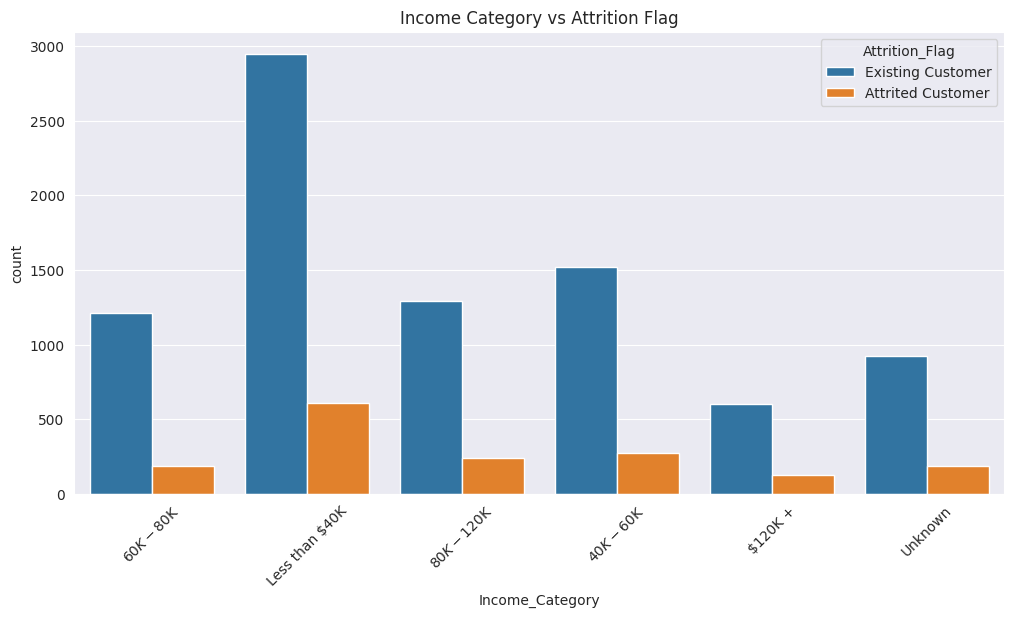

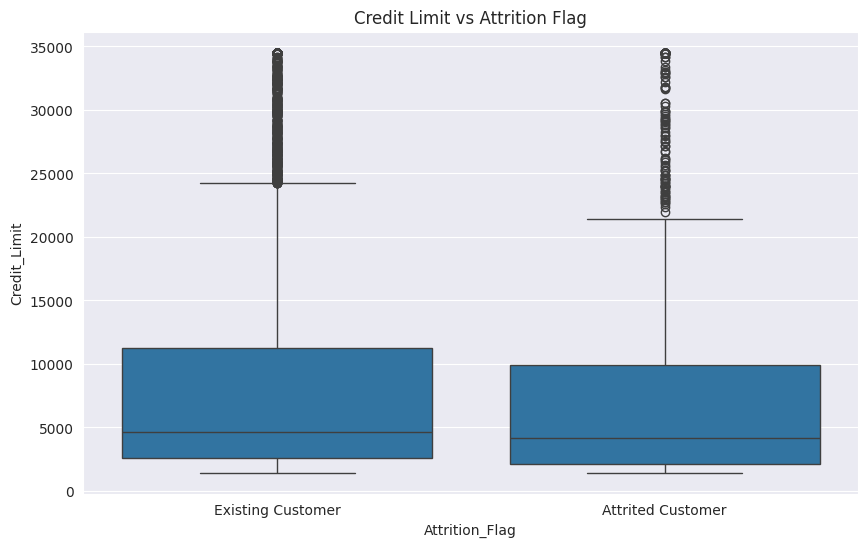

In [14]:
# Relationship between Age and Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.title('Customer Age vs Attrition Flag')
plt.show()

# Relationship between Income Category and Attrition
plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.title('Income Category vs Attrition Flag')
plt.xticks(rotation=45)
plt.show()

# Relationship between Credit Limit and Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Credit Limit vs Attrition Flag')
plt.show()


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


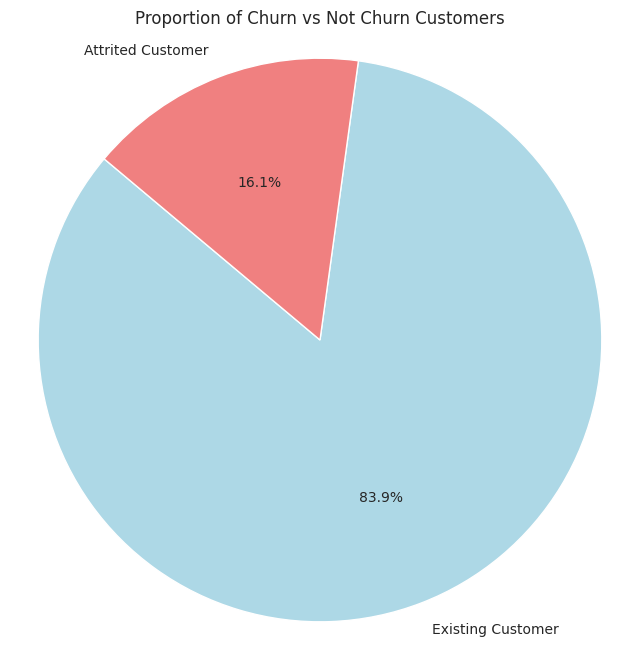

In [17]:
# Calculate the proportion of churn vs not churn customers
churn_counts = df['Attrition_Flag'].value_counts()
print(churn_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Churn vs Not Churn Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Data Preprocessing**

In [39]:

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  769911858               1            40       0                4   
4  709106358               1            40       1                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                3               3                4              0   
4                5               1                2              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1     

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the features for scaling
features = df.drop(columns=['CLIENTNUM', 'Attrition_Flag'])
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

# Include the target variable back into the DataFrame
df_scaled = pd.concat([df[['CLIENTNUM', 'Attrition_Flag']], scaled_features], axis=1)

print(df_scaled.head())

   CLIENTNUM  Attrition_Flag  Customer_Age    Gender  Dependent_count  \
0  768805383               1     -0.165406  1.059956         0.503368   
1  818770008               1      0.333570 -0.943436         2.043199   
2  713982108               1      0.583058  1.059956         0.503368   
3  769911858               1     -0.789126 -0.943436         1.273283   
4  709106358               1     -0.789126  1.059956         0.503368   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0        -0.052637       -0.628128        -0.574182      -0.259473   
1        -0.597678        0.727306         0.755053      -0.259473   
2        -0.597678       -0.628128         0.090436      -0.259473   
3        -0.052637        2.082739         0.755053      -0.259473   
4         1.037447       -0.628128        -0.574182      -0.259473   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0        0.384621  ...               -1.327136               0.4924

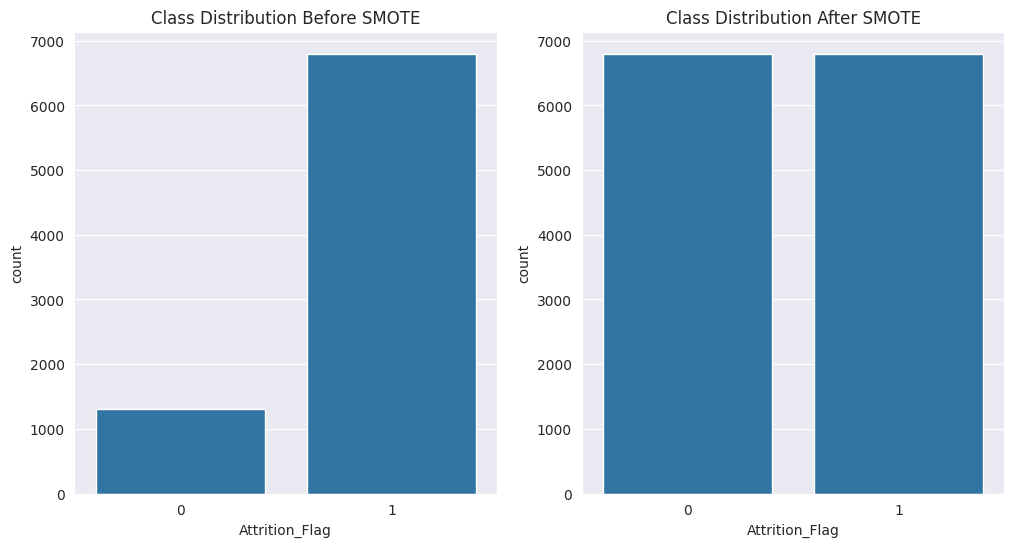

Original training set size: 8101 samples
Resampled training set size: 13602 samples


In [23]:
# Define the features and target variable
X = df_scaled.drop(columns=['CLIENTNUM', 'Attrition_Flag'])
y = df_scaled['Attrition_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Class Distribution Before SMOTE')

sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title('Class Distribution After SMOTE')

plt.show()

print(f'Original training set size: {X_train.shape[0]} samples')
print(f'Resampled training set size: {X_train_resampled.shape[0]} samples')

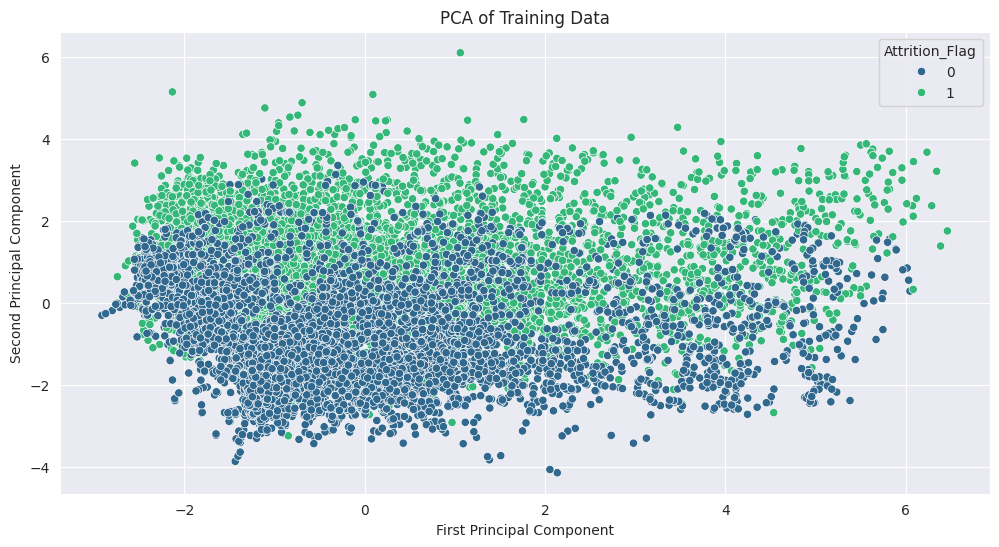

Explained variance by the first 2 principal components: [0.16626708 0.12599587]


In [24]:

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Visualize PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_resampled, palette='viridis')
plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by the first 2 principal components: {explained_variance}')

**Model Selection And Evaluation**

In [25]:

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 284   43]
 [  42 1657]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       327
           1       0.97      0.98      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [40]:


# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')


ROC AUC Score: 0.8982320955122008


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 20, 'n_estimators': 300}


In [28]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                     Feature  Importance
16            Total_Trans_Ct    0.221231
15           Total_Trans_Amt    0.178021
17       Total_Ct_Chng_Q4_Q1    0.097816
12       Total_Revolving_Bal    0.097475
9     Months_Inactive_12_mon    0.059441
8   Total_Relationship_Count    0.057836
18     Avg_Utilization_Ratio    0.051484
14      Total_Amt_Chng_Q4_Q1    0.049393
10     Contacts_Count_12_mon    0.044409
0               Customer_Age    0.025991
13           Avg_Open_To_Buy    0.023854
11              Credit_Limit    0.022105
7             Months_on_book    0.018001
2            Dependent_count    0.014622
3            Education_Level    0.010268
5            Income_Category    0.009307
4             Marital_Status    0.009303
1                     Gender    0.007983
6              Card_Category    0.001460


In [36]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)  # Set probability=True for SVM to get probabilities
}

# Fit models and make predictions
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate performance metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    }


In [37]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={'index': 'Model'})
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.849951   0.889225  0.849951  0.862038  0.916155
1        Decision Tree  0.923988   0.926769  0.923988  0.925148  0.875655
2        Random Forest  0.958045   0.957994  0.958045  0.958019  0.987705
3    Gradient Boosting  0.955577   0.957268  0.955577  0.956206  0.986551
4                  SVM  0.922507   0.930996  0.922507  0.925329  0.962523


In [34]:

# Convert target variable to categorical
y_train_resampled_cat = to_categorical(y_train_resampled)
y_test_cat = to_categorical(y_test)

# Initialize the model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: churn and not churn

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled_cat, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f'Neural Network - Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/100
341/341 [==============================] - 4s 6ms/step - loss: 0.3653 - accuracy: 0.8391 - val_loss: 0.3170 - val_accuracy: 0.8618
Epoch 2/100
341/341 [==============================] - 2s 6ms/step - loss: 0.2306 - accuracy: 0.9068 - val_loss: 0.2233 - val_accuracy: 0.9111
Epoch 3/100
341/341 [==============================] - 4s 11ms/step - loss: 0.1917 - accuracy: 0.9212 - val_loss: 0.2023 - val_accuracy: 0.9250
Epoch 4/100
341/341 [==============================] - 1s 4ms/step - loss: 0.1709 - accuracy: 0.9332 - val_loss: 0.2001 - val_accuracy: 0.9265
Epoch 5/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1593 - accuracy: 0.9386 - val_loss: 0.1764 - val_accuracy: 0.9327
Epoch 6/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1493 - accuracy: 0.9415 - val_loss: 0.1572 - val_accuracy: 0.9383
Epoch 7/100
341/341 [==============================] - 1s 3ms/step - loss: 0.1399 - accuracy: 0.9470 - val_loss: 0.1111 - val_accuracy: 0.958

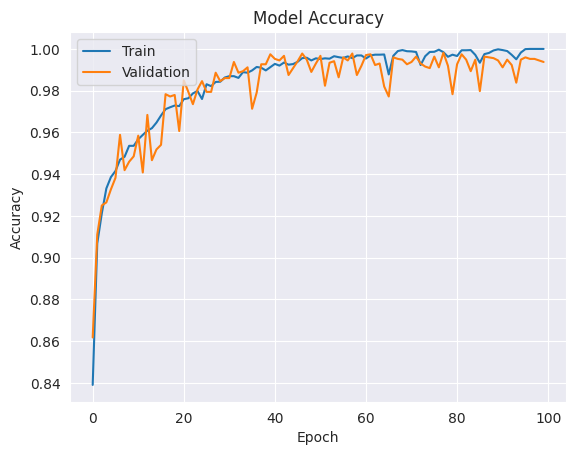

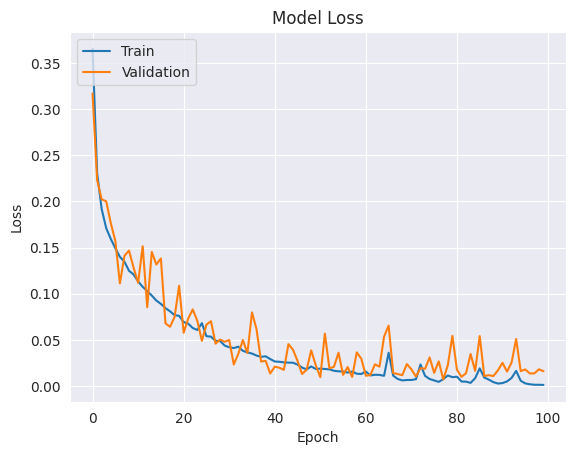

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
